In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
final_df=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [8]:
final_df['Current Year'] = 2020

In [9]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [10]:
final_df['number_of_year'] = final_df['Current Year'] - final_df['Year']

In [11]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,number_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [12]:
final_df.drop(['Year'], axis=1, inplace=True)

In [13]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,number_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
# One hot encoding
final_df = pd.get_dummies(final_df,drop_first=True)

In [15]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


In [16]:
final_df = final_df.drop(['Current Year'], axis=1)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


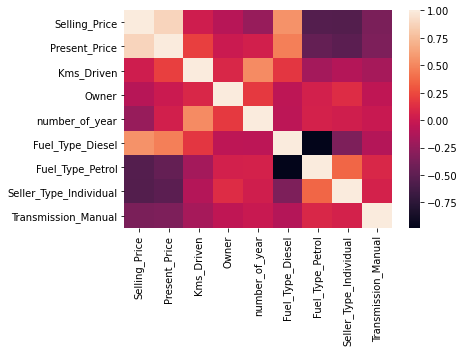

In [18]:
sns.heatmap(final_df.corr())
plt.show()

In [19]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [20]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [22]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[0.37852653 0.03764623 0.00133739 0.07989099 0.23148404 0.00485821
 0.13718298 0.12907365]


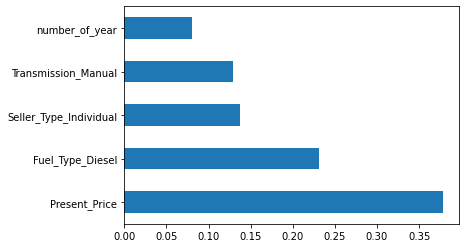

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
# Creating function that returns the evaluation metrics
def metrics(t, p):
    mae = mean_absolute_error(t,p)
    #mse = ((t-p)**2).mean()
    mse = mean_squared_error(t,p)
    rmse = np.sqrt(mse)
    rsqr = r2_score(t,p)
    
    print('RMSE      :',rmse)
    print('MSE       :',mse)
    print('MAE       :',mae)
    print('R²        :',rsqr) 

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

Linear Regression

In [31]:
lin_reg_model = LinearRegression().fit(x_train, y_train)
lin_reg_predict = lin_reg_model.predict(x_test)
metrics(y_test, lin_reg_predict)

RMSE      : 1.8819533737447283
MSE       : 3.541748500949165
MAE       : 1.2698356709065448
R²        : 0.875615524620501


LASSO Regression

In [32]:
l2_model = Lasso(alpha=0.001).fit(x_train, y_train)
l2_predict = l2_model.predict(x_test)
metrics(y_test, l2_predict)

RMSE      : 1.8809917354590826
MSE       : 3.538129908865371
MAE       : 1.2689765330426324
R²        : 0.8757426078049322


Ridge Regression

In [33]:
l1_model = Ridge(alpha=0.2).fit(x_train, y_train)
l1_predict = l1_model.predict(x_test)
metrics(y_test, l1_predict)

RMSE      : 1.8805442562365131
MSE       : 3.5364466996641406
MAE       : 1.2686463056728785
R²        : 0.8758017212889622


Decision Tree

In [34]:
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
dt_predict = dt_model.predict(x_test)
metrics(y_test, dt_predict)

RMSE      : 1.1326939588413123
MSE       : 1.2829956043956043
MAE       : 0.6971428571428571
R²        : 0.9549418217797839


Random Forest

In [35]:
rf_model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)
metrics(y_test, rf_predict)

RMSE      : 1.0381979445067413
MSE       : 1.0778549719780226
MAE       : 0.6456252747252749
R²        : 0.9621462604731134


Gradient Boost

In [36]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)
gb_predict = gb_model.predict(x_test)
metrics(y_test, gb_predict)

RMSE      : 1.1057800323161053
MSE       : 1.222749479869007
MAE       : 0.6177967479708608
R²        : 0.9570576362118026


AdaBoost

In [37]:
ab_model = AdaBoostRegressor().fit(x_train, y_train)
ab_predict = ab_model.predict(x_test)
metrics(y_test, ab_predict)

RMSE      : 1.4386824093103239
MSE       : 2.0698070748589585
MAE       : 1.0795797069910094
R²        : 0.9273093877009868


XGBoost

In [38]:
xgb_model = XGBRegressor(n_estimators=200).fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)
metrics(y_test, xgb_predict)

RMSE      : 1.1407501475744612
MSE       : 1.301310899191155
MAE       : 0.6923099593932813
R²        : 0.9542985975830476


KNN

In [39]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
metrics(y_test, knn_predict)

RMSE      : 5.590924007062451
MSE       : 31.258431252747254
MAE       : 3.9618681318681315
R²        : -0.09778081970448427


In [40]:
def model_eval_metric(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [41]:
eval_metric=[]
ml_algo=['Linear Regression','LASSO', 'Ridge', 'Decision Tree','Random Forest','Gradient Boost', 'Ada Boost', 'XGBoost', 'KNN']
ml_models= [lin_reg_model,l2_model,l1_model,dt_model,rf_model,gb_model,ab_model,xgb_model,knn_model]
predictions =[lin_reg_predict,l2_predict,l1_predict,dt_predict,rf_predict,gb_predict,ab_predict,xgb_predict,knn_predict]
i=0
for mod in ml_algo:
    R_SQR,MSE,RMSE,MAE = model_eval_metric(ml_models[i],x_test,y_test,predictions[i])
    eval_metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
model_performance=pd.DataFrame(eval_metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError',
                                                     'MeanAbsoluteError'])

In [42]:
model_performance.sort_values(by='RootMeanSquaredError')

,Model,R-Squared,MeanSquaredError,RootMeanSquaredError,MeanAbsoluteError
4,Random Forest,0.962146,1.077855,1.038198,0.645625
5,Gradient Boost,0.957058,1.222749,1.105780,0.617797
3,Decision Tree,0.954942,1.282996,1.132694,0.697143
7,XGBoost,0.954299,1.301311,1.140750,0.692310
6,Ada Boost,0.927309,2.069807,1.438682,1.079580
2,Ridge,0.875802,3.536447,1.880544,1.268646
1,LASSO,0.875743,3.538130,1.880992,1.268977
0,Linear Regression,0.875616,3.541749,1.881953,1.269836
8,KNN,-0.097781,31.258431,5.590924,3.961868


Random Forest is a better model

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [47]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [49]:
predictions = rf_random.predict(x_test)

In [50]:
metrics(y_test,predictions)

RMSE      : 1.6319957217401857
MSE       : 2.66341003577827
MAE       : 0.8838044409715596
R²        : 0.9064623419952066


In [51]:
import pickle 

file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)